In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t = np.linspace(0, 0.5, 5000)
tet = 2*np.pi
s = 8 * (np.sin(40 * tet * t) + 0.5 * np.sin(90 * tet * t) + 0.3 * np.sin(130 * tet * t))
T = t[1] - t[0]
N = s.size
f = np.linspace(0, 1/T, N)

D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


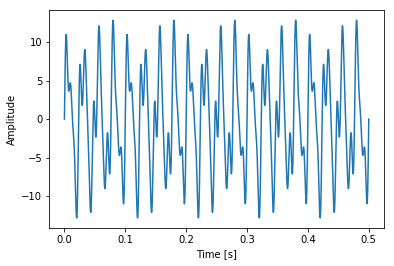

In [4]:
#original signal
fig1 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
fig1.show()

In [5]:
fft = np.fft.fft(s)
slic = 100

D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


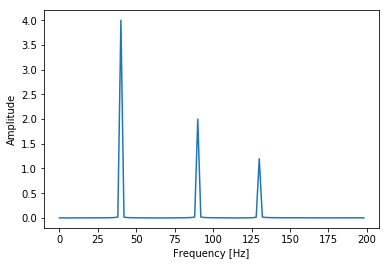

In [7]:
#Fourier transformation of original signal
fig2 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N//2][:slic], (np.abs(fft)[:N//2] * 1 / N)[:slic])
fig2.show()

In [8]:
noise = np.random.normal(0, 4, N)
signal = s + noise

D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


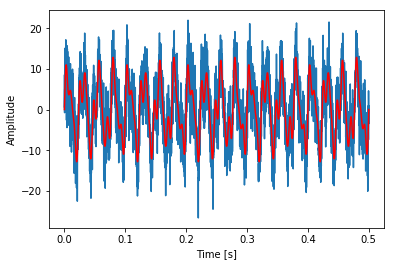

In [9]:
#Noized signal
fig3 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, signal)
plt.plot(t, s, 'r')
fig3.show()

In [10]:
fft_signal = np.fft.fft(signal)

D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


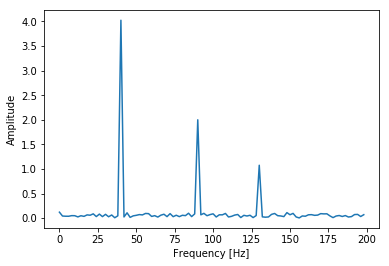

In [12]:
#Fourier transformation of noized signal
fig4 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N//2][:slic], np.abs(fft_signal)[:N//2][:slic] * 1 / N)
fig4.show()

In [13]:
noise_level = 0.5
filtered_fft_signal = fft_signal.copy()
for i in range(len(filtered_fft_signal)):
    if np.abs(filtered_fft_signal[i]/N) < noise_level:
        filtered_fft_signal[i] = 0

D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


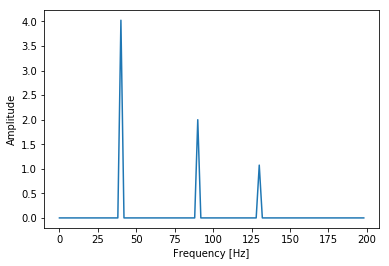

In [15]:
#Fourier transformation of filtered noized signal
fig5 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N//2][:slic], (np.abs(filtered_fft_signal)[:N//2][:slic] * 1 / N))
fig5.show()

In [16]:
filtered_signal = np.fft.ifft(filtered_fft_signal)

D:\Programes\Anaconda_3.6\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Programes\Anaconda_3.6\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


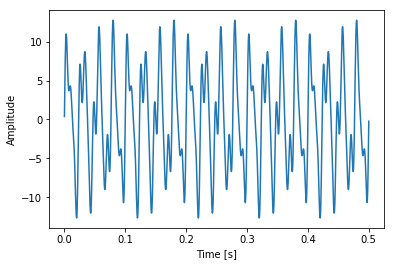

In [17]:
#Filtered noized signal
fig6 = plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, filtered_signal)
fig6.show()